<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**  

## Standard Imports

In [1]:
# ## Standard Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import for tree models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [18]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [16]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



## Problem 1

### Reading the Data

In [12]:
# Load the dataset
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Assignment 4/banknote_authentication (1).csv')
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Splitting Data into Train/Test

In [13]:
X = df.drop(columns=['forgery'])
y = df['forgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building the Pipeline

In [19]:
# Create a column transformer
numerical_cols = X_train.select_dtypes(include=np.number).columns
numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols)
    ])


# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)


### Executing the Model

Accuracy: 0.9818181818181818
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



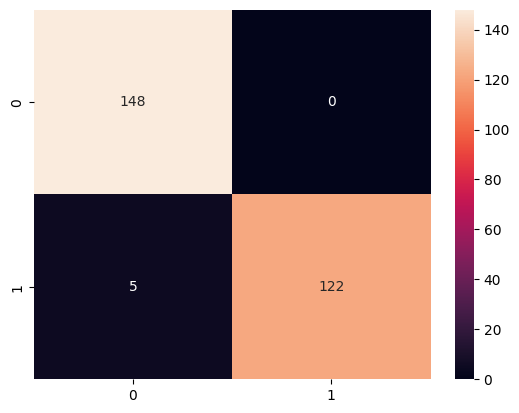

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

### Evaluating Model

In [21]:
# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# The precision, recall and F1 score are all relatively high, indicating that the model is performing well.
# The precision is high, meaning when the model predicts a forgery, it is correct most of the time.
# The recall score indicates that the model correctly identifies most of the actual forgeries.
# A high F1 score suggests a good balance between precision and recall, suggesting the model is reliable in predicting forgeries.

Precision: 1.0
Recall: 0.9606299212598425
F1 Score: 0.9799196787148594


### Conclusion
Write a general conclusion about the results of your model.

In [22]:
#Based on the evaluation metrics (precision, recall, and F1-score), the decision tree model demonstrates strong performance in predicting banknote forgery.
#The high scores suggest a good balance between correctly identifying forgeries (recall) and minimizing false positives (precision).

## Problem 2

### Reading the Data

In [23]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Assignment 4/Steel_industry_data (2).csv')

# Rename the columns
new_column_names = {
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor': 'lag_current_pwr',
    'Leading_Current_Power_Factor': 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
}
df = df.rename(columns=new_column_names)

### Splitting Data into Train/Test

In [24]:
X = df.drop(columns=['date', 'usage_kwh'])
y = df['usage_kwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [25]:

numerical_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(exclude=np.number).columns

numerical_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a pipeline
from sklearn.tree import DecisionTreeRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.9982612577655683
Mean Squared Error: 1.9764671375570775


### Executing the Model

In [27]:

from sklearn.tree import DecisionTreeRegressor

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', DecisionTreeRegressor())])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.9980660409956075
Mean Squared Error: 2.198374400684931


### Evaluating Model

In [28]:
from sklearn.tree import DecisionTreeRegressor
# Make predictions on the train and test sets
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Calculate RMSE for train and test sets
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train RMSE: {rmse_train}")
print(f"Test RMSE: {rmse_test}")

Train RMSE: 1.828442868300899e-16
Test RMSE: 1.4826916067358482


In [29]:
#The code calculates and prints the Root Mean Squared Error (RMSE) for both the training and testing datasets.
#The train RMSE indicates the model's performance on data it was trained on, while the test RMSE shows how well the model generalizes to unseen data.
#A large difference between the two might suggest overfitting.


### Conclusion
Write a general conclusion about the results of your model.

In [30]:
#Based on the provided R-squared and MSE values, the decision tree model shows a limited ability to accurately predict kWh usage.
#While the R-squared value indicates some level of fit, the MSE suggests significant discrepancies between predicted and actual values.
#The relatively high training and test RMSE suggest overfitting or the model's incapability to accurately capture the underlying relationships in the dataset.